# Lecture Notebook N01

Thursday, September 26, 2019

This is the standard import we will use in the first portion of the class. It imports the core SymPy tools and the special tools from the mechanics package. The `init_printing()` function is optional but it will increase the number of outputs that print as symbolic math.

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
sm.init_printing()

This creates three symbols and shows how to create expressions with them.

In [2]:
a, b, c = sm.symbols('a, b, c')

In [3]:
a + b**2

In [4]:
expr = a + b**2

In [5]:
expr * expr

SymPy will not simplify or expand expressions by default. You have to use various functions to do so. This shouws how to expand the expression we created above using the `expand` function.

In [6]:
new_expr = expr*expr

In [7]:
new_expr

In [8]:
sm.expand(new_expr)

If you know the name of the function you want to use you can open it's help documentation by appending the `?` symbol. This only works in the notebook or IPython terminal, not the basic Python command prompt.

In [9]:
sm.expand?

Signature: sm.expand(e, deep=True, modulus=None, power_base=True, power_exp=True, mul=True, log=True, multinomial=True, basic=True, **hints)
Docstring:
Expand an expression using methods given as hints.

Hints evaluated unless explicitly set to False are:  ``basic``, ``log``,
``multinomial``, ``mul``, ``power_base``, and ``power_exp`` The following
hints are supported but not applied unless set to True:  ``complex``,
``func``, and ``trig``.  In addition, the following meta-hints are
supported by some or all of the other hints:  ``frac``, ``numer``,
``denom``, ``modulus``, and ``force``.  ``deep`` is supported by all
hints.  Additionally, subclasses of Expr may define their own hints or
meta-hints.

The ``basic`` hint is used for any special rewriting of an object that
should be done automatically (along with the other hints like ``mul``)
when expand is called. This is a catch-all hint to handle any sort of
expansion that may not be described by the existing hint names. To use
this hint

Greek symbols will render nicely too.

In [10]:
omega = sm.symbols('omega')

In [11]:
omega

You can create arbitrary functions of variables. In this case we make a function of $t$ to represent time.

In [12]:
t = sm.symbols('t')

In [13]:
f = sm.Function('F')

SymPy knows how to differentiate these mathematical functions:

f(t)

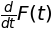

In [14]:
sm.diff(f(t), t)

The mechanics package has a convience function for creating functions of time.

In [15]:
f_of_t = me.dynamicsymbols('f')

In [16]:
f_of_t

SymPy is a powerful tool. It can solve many integrals that are not that fun to solve by hand. For example:

In [17]:
sm.integrate(sm.cos(omega)*(omega**2)/sm.exp(omega), omega)

This stores the prior result in the variable `long_expr`.

In [18]:
long_expr = _

In [19]:
long_expr

SymPy has a powerful printing system. Here it prints a latex version of the above expression.

In [20]:
print(sm.latex(long_expr))

\frac{\omega^{2} e^{- \omega} \sin{\left(\omega \right)}}{2} - \frac{\omega^{2} e^{- \omega} \cos{\left(\omega \right)}}{2} + \omega e^{- \omega} \sin{\left(\omega \right)} + \frac{e^{- \omega} \sin{\left(\omega \right)}}{2} + \frac{e^{- \omega} \cos{\left(\omega \right)}}{2}


You can print output for many othter programming languages too:

In [21]:
sm.ccode(long_expr)

'(1.0/2.0)*pow(omega, 2)*exp(-omega)*sin(omega) - 1.0/2.0*pow(omega, 2)*exp(-omega)*cos(omega) + omega*exp(-omega)*sin(omega) + (1.0/2.0)*exp(-omega)*sin(omega) + (1.0/2.0)*exp(-omega)*cos(omega)'

In [22]:
sm.rust_code(long_expr)

'(1_f64/2.0)*omega.powi(2)*(-omega).exp()*omega.sin() - 1_f64/2.0*omega.powi(2)*(-omega).exp()*omega.cos() + omega*(-omega).exp()*omega.sin() + (1_f64/2.0)*(-omega).exp()*omega.sin() + (1_f64/2.0)*(-omega).exp()*omega.cos()'

The expressions can be evaluated numerically to arbitrary precision with `evalf()`.

In [23]:
long_expr.evalf(subs={omega: 10.0}, n=1000)

If you want to evaluate the expressions using floating point values, it is best to use `lambdify` which generates a Python function that can be used to evaluated the expression.

In [24]:
num_func = sm.lambdify(omega, long_expr)

In [25]:
help(num_func)

Help on function _lambdifygenerated:

_lambdifygenerated(omega)
    Created with lambdify. Signature:
    
    func(omega)
    
    Expression:
    
    omega**2*exp(-omega)*sin(omega)/2 - omega**2*exp(-omega)*cos(omega)/2 +...
    
    Source code:
    
    def _lambdifygenerated(omega):
        return ((1/2)*omega**2*exp(-omega)*sin(omega) - 1/2*omega**2*exp(-omega)*cos(omega) + omega*exp(-omega)*sin(omega) + (1/2)*exp(-omega)*sin(omega) + (1/2)*exp(-omega)*cos(omega))
    
    
    Imported modules:



In [26]:
num_func(10.0)

In [27]:
num_func(13.3434)